## SRFP AQI data analysis and visualization for Bengaluru

In [2]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

from functions import dplot, stat_calc, aqi_calc, score_calc

# Use seaborn style defaults and set default figure size
sns.set_style("whitegrid")

In [3]:
dfmod = pd.read_csv('data/bengaluru_mod.csv')
dfobs = pd.read_csv('data/bengaluru_obs_utc.csv')

In [4]:
dfmod.head()

,date,hour,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev
0,2020-10-31,1:00:00,58.16,0.57,65.43,0.64
1,2020-10-31,2:00:00,55.78,0.96,62.72,1.12
2,2020-10-31,3:00:00,54.24,1.06,61.05,1.24
3,2020-10-31,4:00:00,53.50,1.14,60.24,1.24
4,2020-10-31,5:00:00,52.87,2.31,59.51,2.39


In [5]:
dfobs.head()

,date,hour,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev
0,2020-10-31,1:00:00,67.82,26.54,120.62,77.35
1,2020-10-31,2:00:00,72.54,30.73,131.35,59.79
2,2020-10-31,3:00:00,64.90,22.69,120.17,51.47
3,2020-10-31,4:00:00,58.63,20.28,108.28,51.22
4,2020-10-31,5:00:00,61.47,20.32,109.35,44.14


In [6]:
dfmod.isna().sum()

date               0
hour               0
mod_PM2.5          0
mod_PM2.5_stdev    0
mod_PM10           0
mod_PM10_stdev     0
dtype: int64

In [7]:
dfobs.isna().sum()

date                0
hour                0
obs_PM2.5          96
obs_PM2.5_stdev    92
obs_PM10           63
obs_PM10_stdev     92
dtype: int64

In [8]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [9]:
dfmod.head()

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime
datetime,,,,,
2020-10-31 01:00:00,58.16,0.57,65.43,0.64,2020-10-31 01:00:00
2020-10-31 02:00:00,55.78,0.96,62.72,1.12,2020-10-31 02:00:00
2020-10-31 03:00:00,54.24,1.06,61.05,1.24,2020-10-31 03:00:00
2020-10-31 04:00:00,53.50,1.14,60.24,1.24,2020-10-31 04:00:00
2020-10-31 05:00:00,52.87,2.31,59.51,2.39,2020-10-31 05:00:00


In [10]:
dfobs = dfobs.interpolate(method='time')

In [11]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

## Plot of time series with error bars

In [12]:
# Removing the october readings temporarily

dfmod = dfmod.iloc[23:, :]
dfobs = dfobs.iloc[23:, :]

In [13]:
dfobs.head()

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,60.91,23.82,98.28,41.50,2020-11-01 00:00:00
2020-11-01 01:00:00,66.16,26.01,114.32,51.89,2020-11-01 01:00:00
2020-11-01 02:00:00,66.50,30.76,108.25,54.97,2020-11-01 02:00:00
2020-11-01 03:00:00,66.78,28.03,123.62,49.46,2020-11-01 03:00:00
2020-11-01 04:00:00,60.11,23.57,115.13,47.58,2020-11-01 04:00:00


In [14]:
# Extracting the different values for the months

dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month

splits1 = dfmod.groupby('month')
splits2 = dfobs.groupby('month')

dfmod_jan = list(splits1)[0][1]
dfmod_nov = list(splits1)[1][1]
dfmod_dec = list(splits1)[2][1]

dfobs_jan = list(splits2)[0][1]
dfobs_nov = list(splits2)[1][1]
dfobs_dec = list(splits2)[2][1]

dfmod_jan

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime,month
datetime,,,,,,
2021-01-01 00:00:00,37.98,1.13,49.45,1.20,2021-01-01 00:00:00,1
2021-01-01 01:00:00,35.26,0.99,46.26,0.93,2021-01-01 01:00:00,1
2021-01-01 02:00:00,34.52,1.38,44.73,1.53,2021-01-01 02:00:00,1
2021-01-01 03:00:00,35.63,1.18,46.17,1.44,2021-01-01 03:00:00,1
2021-01-01 04:00:00,38.27,1.31,48.89,1.52,2021-01-01 04:00:00,1
...,...,...,...,...,...,...
2021-01-31 19:00:00,54.01,3.18,58.71,3.31,2021-01-31 19:00:00,1
2021-01-31 20:00:00,50.77,3.00,55.35,3.13,2021-01-31 20:00:00,1
2021-01-31 21:00:00,45.54,3.11,49.99,3.28,2021-01-31 21:00:00,1


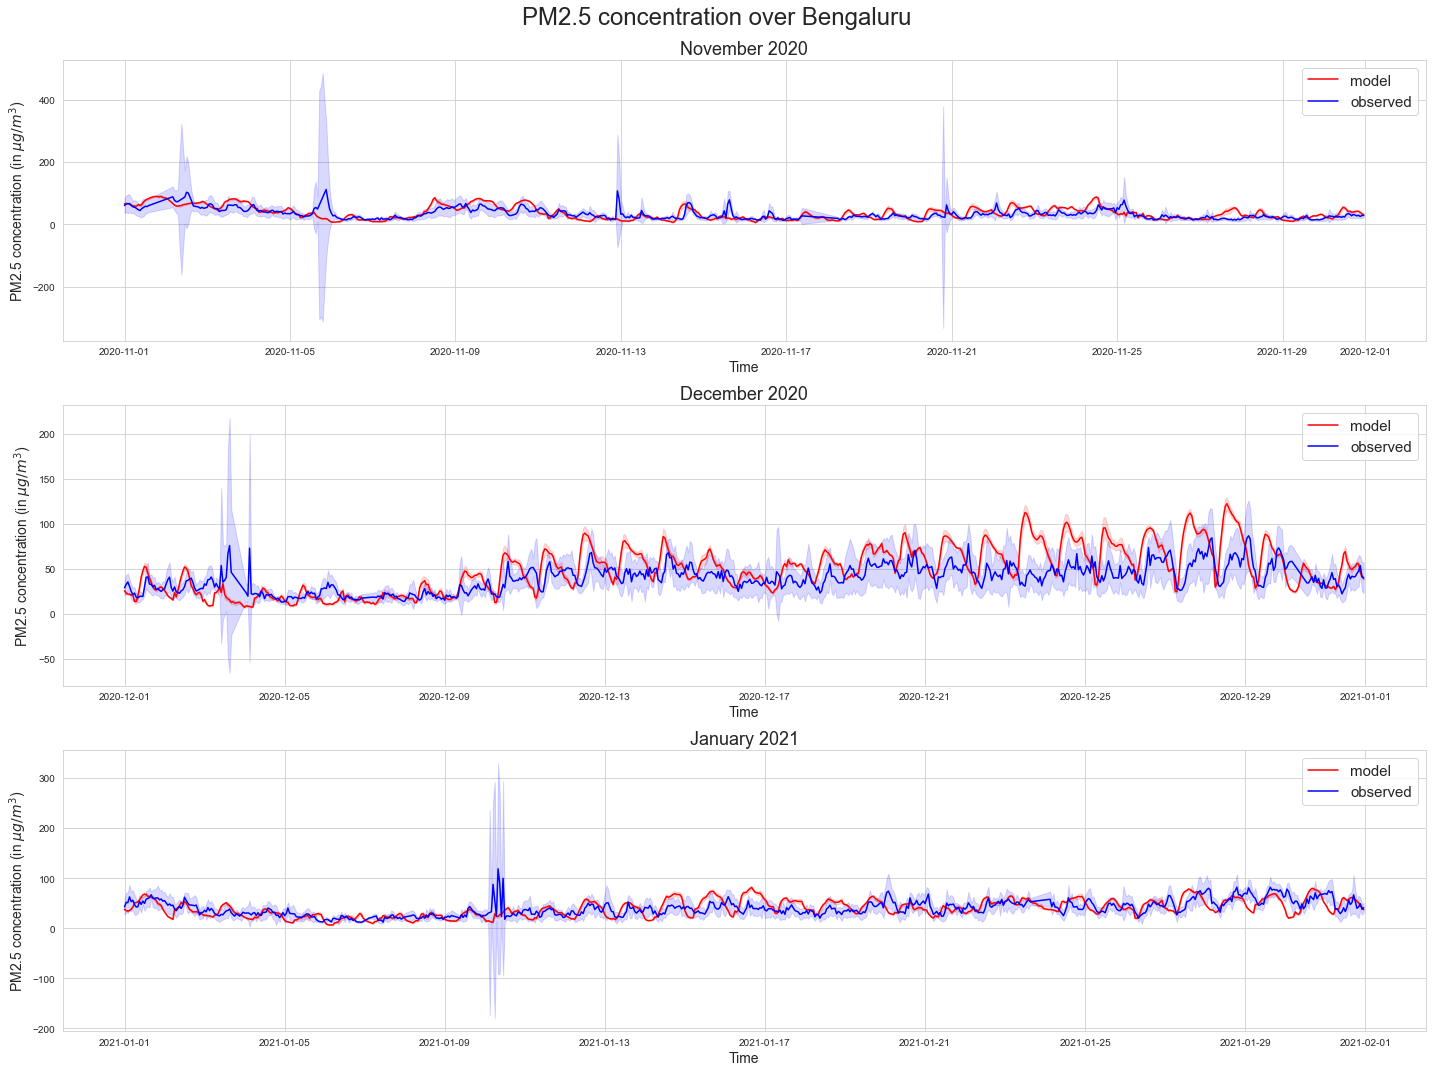

In [15]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM2.5'], yerr=dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM2.5'] + dfmod_nov['mod_PM2.5_stdev'], dfmod_nov['mod_PM2.5'] - dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM2.5'], yerr=dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM2.5'] + dfobs_nov['obs_PM2.5_stdev'], dfobs_nov['obs_PM2.5'] - dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_dec.index, dfmod_dec['mod_PM2.5'], yerr=dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM2.5'] + dfmod_dec['mod_PM2.5_stdev'], dfmod_dec['mod_PM2.5'] - dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_dec.index, dfobs_dec['obs_PM2.5'], yerr=dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM2.5'] + dfobs_dec['obs_PM2.5_stdev'], dfobs_dec['obs_PM2.5'] - dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_jan.index, dfmod_jan['mod_PM2.5'], yerr=dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM2.5'] + dfmod_jan['mod_PM2.5_stdev'], dfmod_jan['mod_PM2.5'] - dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_jan.index, dfobs_jan['obs_PM2.5'], yerr=dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM2.5'] + dfobs_jan['obs_PM2.5_stdev'], dfobs_jan['obs_PM2.5'] - dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Bengaluru', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err.png')

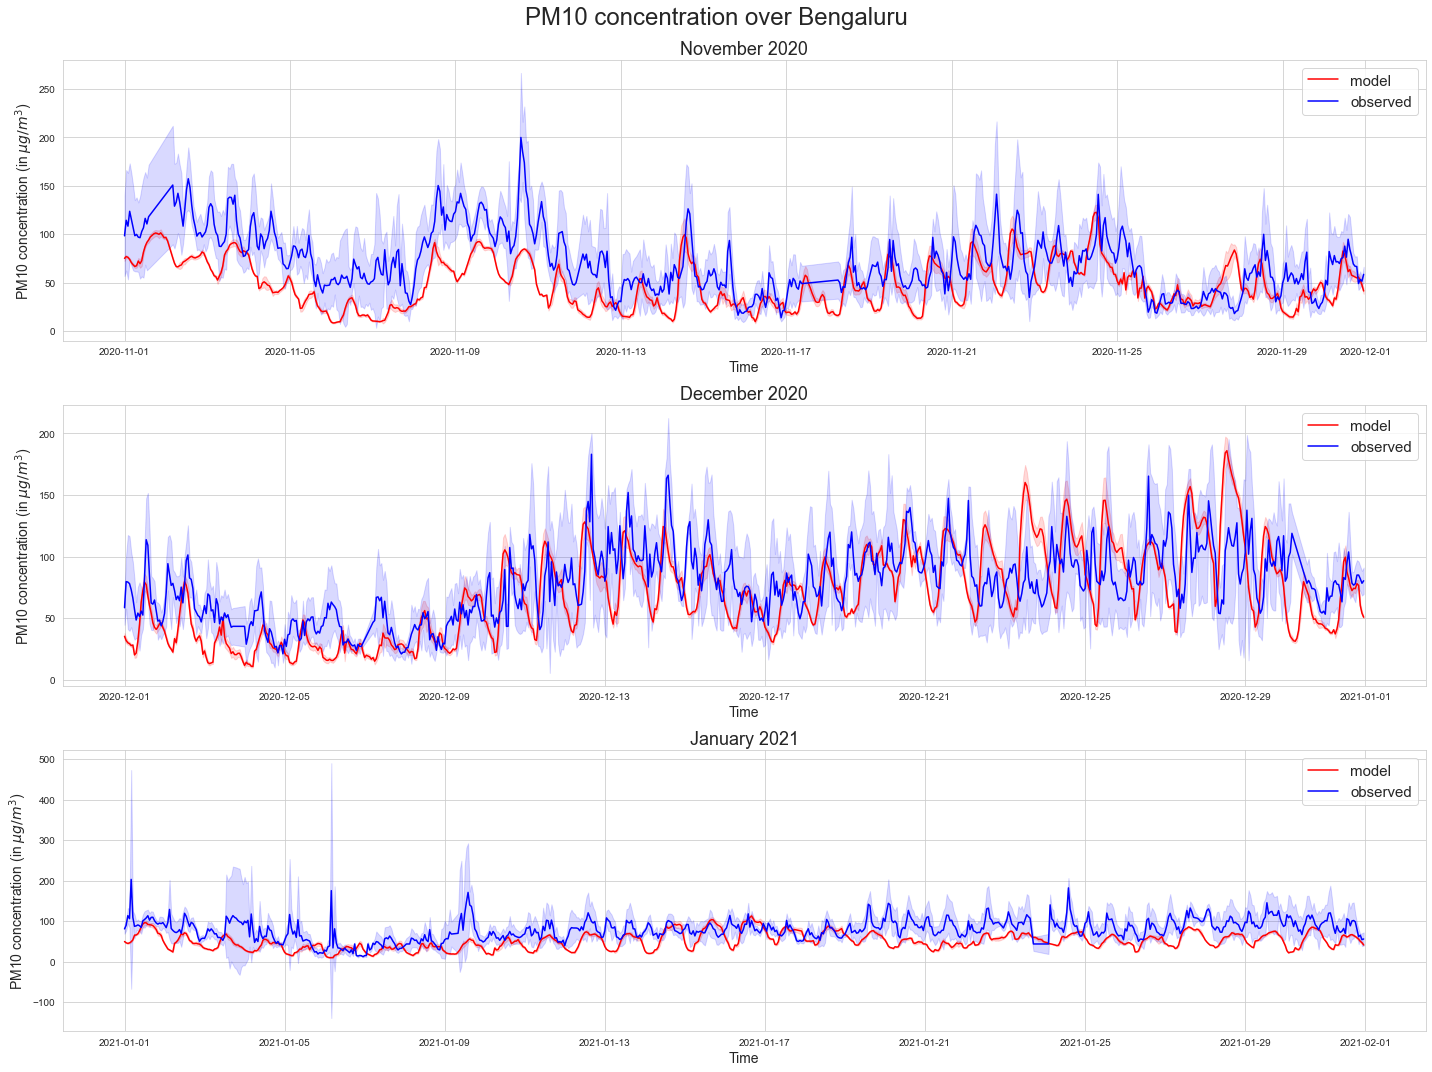

In [16]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM10'] + dfmod_nov['mod_PM10_stdev'], dfmod_nov['mod_PM10'] - dfmod_nov['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM10'] + dfobs_nov['obs_PM10_stdev'], dfobs_nov['obs_PM10'] - dfobs_nov['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM10'] + dfmod_dec['mod_PM10_stdev'], dfmod_dec['mod_PM10'] - dfmod_dec['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM10'] + dfobs_dec['obs_PM10_stdev'], dfobs_dec['obs_PM10'] - dfobs_dec['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM10'] + dfmod_jan['mod_PM10_stdev'], dfmod_jan['mod_PM10'] - dfmod_jan['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM10'] + dfobs_jan['obs_PM10_stdev'], dfobs_jan['obs_PM10'] - dfobs_jan['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Bengaluru', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err.png')

## Plot for diurnal variation

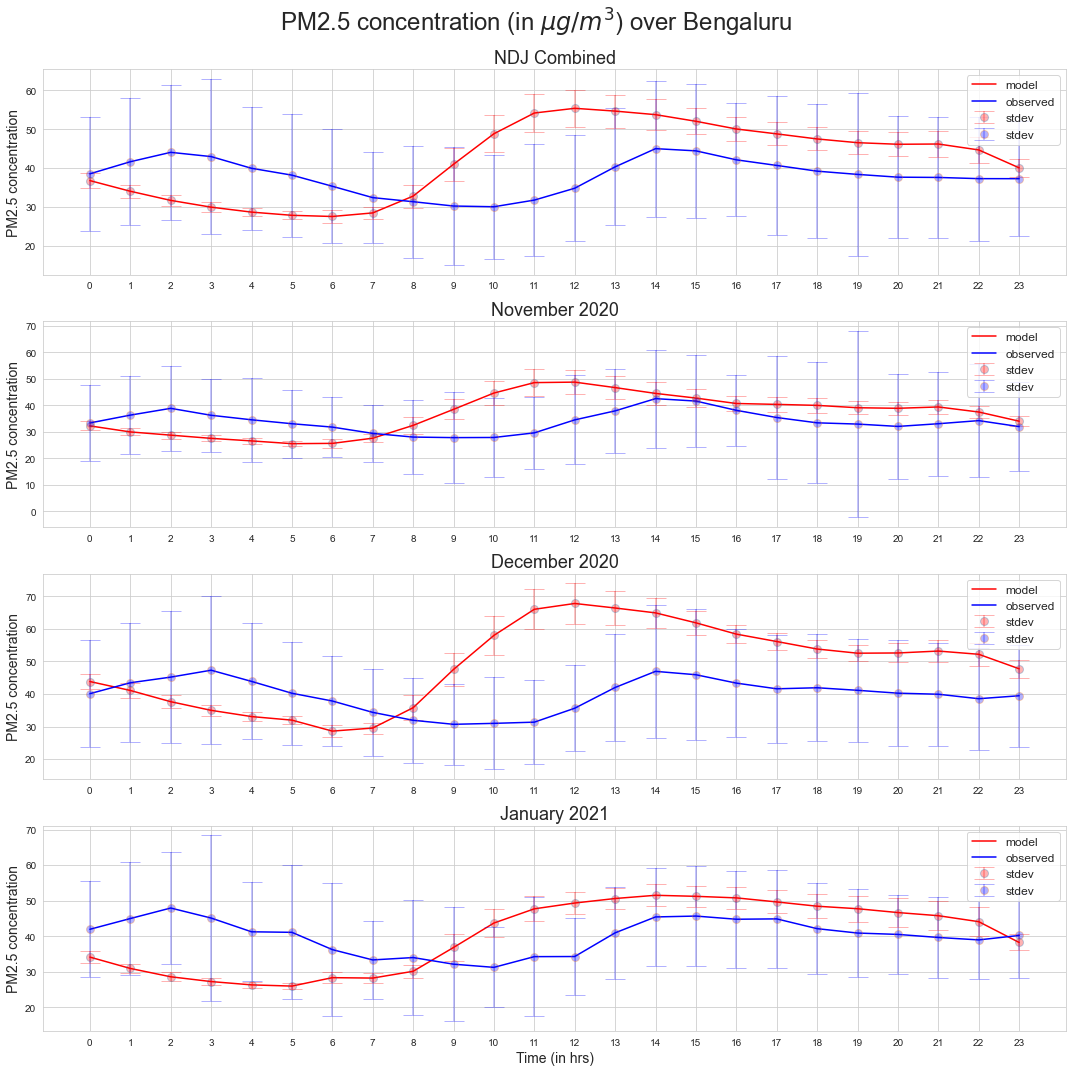

In [17]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration (in $\mu g/m^3$) over Bengaluru', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm25.png')

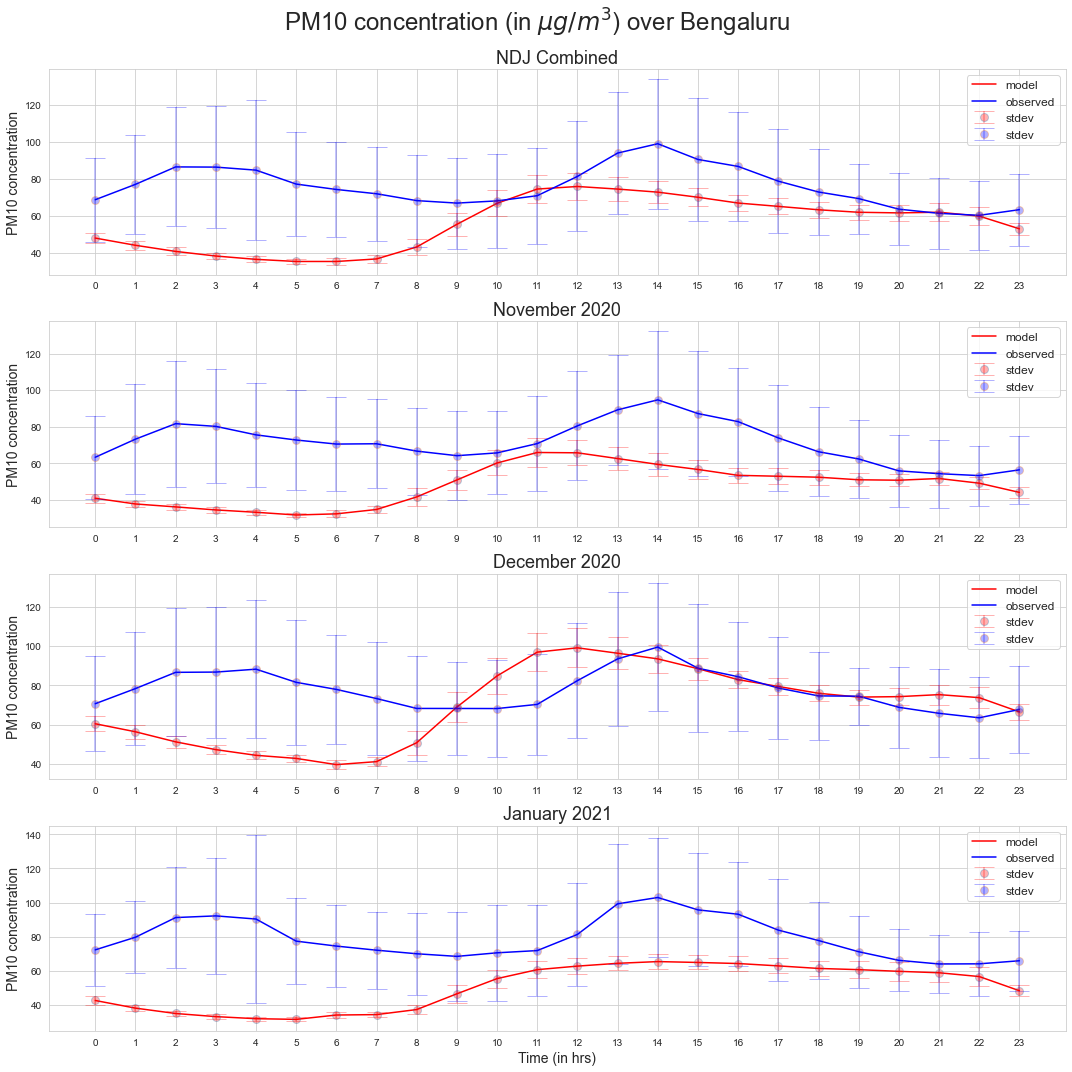

In [18]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration (in $\mu g/m^3$) over Bengaluru', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm10.png')

## Take the running average for the data

In [19]:
# redifing the dataframes

dfmod = pd.read_csv('data/bengaluru_mod.csv')
dfobs = pd.read_csv('data/bengaluru_obs.csv')

In [20]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [21]:
dfobs = dfobs.interpolate(method='time')
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

In [22]:
dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month
dfmod['time'] = dfmod.index.hour
dfobs['time'] = dfobs.index.hour

In [23]:
df = aqi_calc.get_aqi(dfmod, dfobs)

In [24]:
df.head()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:00,65.89,75.01,58.682083,2.745417,65.989583,3.015417,97.612258,65.989583,1,1,60.40,103.42,58.956250,21.803125,107.578750,48.802708,98.067375,105.001975,1,2
2020-11-01 01:00:00,67.31,76.82,59.063333,2.777500,66.464167,3.049583,98.245133,66.464167,1,1,57.20,94.00,58.974167,21.868542,106.760000,48.400625,98.097117,104.461600,1,2
2020-11-01 02:00:00,66.68,76.06,59.517500,2.777917,67.020000,3.040833,98.999050,67.020000,1,1,60.00,95.50,59.191250,22.021875,106.455833,48.479375,98.457475,104.260850,1,2
2020-11-01 03:00:00,64.82,73.89,59.958333,2.788750,67.555000,3.044583,99.730833,67.555000,1,1,58.10,96.58,59.388750,22.134792,106.258333,48.482292,98.785325,104.130500,1,2
2020-11-01 04:00:00,61.94,70.58,60.310000,2.805833,67.985833,3.060833,101.032300,67.985833,2,1,56.25,95.90,59.498750,22.553958,106.252083,48.888542,98.967925,104.126375,1,2


In [25]:
df.shape

(2208, 20)

### Critical PM2.5 and PM10 skill scores combine

In [26]:
score_calc.get_critical_score(df)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([2208, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([2208, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


### Very unhealthy PM2.5 and PM10 skill scores combined

In [27]:
score_calc.get_veryunhealthy_score(df)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([2208, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([2208, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


### Unhealthy PM2.5 and PM10 skill scores combined

In [28]:
score_calc.get_unhealthy_score(df)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([2208, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([2208, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


### Statistical performance combined

In [31]:
stat_calc.get_stat_performance(df, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  3.98505019625604
mean bias pm10 =  -20.083537137681173
mean bias aqi_pm2.5 =  9.064611058272938
mean bias aqi_pm10 =  -19.807226206471427 

fractional bias is :
fractional bias pm2.5 =  0.09949566965631824
fractional bias pm10 =  -0.3035746798325327
fractional bias aqi_pm2.5 =  0.13276370311092286
fractional bias aqi_pm10 =  -0.3008286266202604 

Correlation coefficient is :
corr coeff pm2.5 =  0.7885716152294744  and p-value is =  0.0
corr coeff pm10 =  0.686815831267127  and p-value is =  5.198117144142419e-308
corr coeff aqi_pm2.5 =  0.7394658277989186  and p-value is =  0.0
corr coeff aqi_pm10 =  0.7012891719146024 
  and p-value is =  0.0
RMSE is :
RMSE pm2.5 =  11.764128655442473
RMSE pm10 =  27.06275995384121
RMSE aqi_pm2.5 =  25.762775351206546
RMSE aqi_pm10 =  26.265940459025092 

NMSE is :
NMSE pm2.5 =  0.08648413416101751
NMSE pm10 =  0.17128439727586436
NMSE aqi_pm2.5 =  0.14300908529574374
NMSE aqi_pm10 =  0.16282288534253442 



### Doing the same critical PM2.5 and PM10 skill score for different winter months and also finding the statistical performance

### Extracting the various months

In [32]:
# Extracting the separate values for the winter months separately
dfnov = df.loc['2020-11-01':'2020-11-30']
dfdec = df.loc['2020-12-01':'2020-12-31']
dfjan = df.loc['2021-01-01':'2021-01-31']

### Critical PM2.5 and PM10 scores for separate months

#### November

In [33]:
score_calc.get_critical_score(dfnov)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([720, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([720, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [34]:
score_calc.get_veryunhealthy_score(dfnov)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([720, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([720, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [35]:
score_calc.get_unhealthy_score(dfnov)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([720, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([720, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [36]:
stat_calc.get_stat_performance(dfnov, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  2.3480590277777798
mean bias pm10 =  -24.081810763888896
mean bias aqi_pm2.5 =  5.031256093750005
mean bias aqi_pm10 =  -23.000122604166663 

fractional bias is :
fractional bias pm2.5 =  0.06540652976221911
fractional bias pm10 =  -0.3995923968994991
fractional bias aqi_pm2.5 =  0.0822087915479515
fractional bias aqi_pm10 =  -0.3850998123700395 

Correlation coefficient is :
corr coeff pm2.5 =  0.8117476689632029  and p-value is =  7.126272186565003e-170
corr coeff pm10 =  0.7542504834478925  and p-value is =  2.5793517927977074e-133
corr coeff aqi_pm2.5 =  0.8059986421915788  and p-value is =  1.1233975105774532e-165
corr coeff aqi_pm10 =  0.7543582344390548 
  and p-value is =  2.252419387931979e-133
RMSE is :
RMSE pm2.5 =  10.682217116403153
RMSE pm10 =  30.00706814511488
RMSE aqi_pm2.5 =  20.65077339011612
RMSE aqi_pm10 =  28.407252922126094 

NMSE is :
NMSE pm2.5 =  0.08863632147829933
NMSE pm10 =  0.2582231597479944
NMSE aqi_pm2.5 =  0.114048798698

#### December

In [37]:
score_calc.get_critical_score(dfdec)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([744, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [38]:
score_calc.get_veryunhealthy_score(dfdec)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([744, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [39]:
score_calc.get_unhealthy_score(dfdec)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([744, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [40]:
stat_calc.get_stat_performance(dfdec, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  9.344893593189962
mean bias pm10 =  -8.082036850358426
mean bias aqi_pm2.5 =  22.048307106854818
mean bias aqi_pm10 =  -8.375007007915167 

fractional bias is :
fractional bias pm2.5 =  0.21173128073792696
fractional bias pm10 =  -0.11044622189713994
fractional bias aqi_pm2.5 =  0.2875252140490518
fractional bias aqi_pm10 =  -0.11504278925679597 

Correlation coefficient is :
corr coeff pm2.5 =  0.8631944699568561  and p-value is =  1.9522083401086645e-222
corr coeff pm10 =  0.8397329511492124  and p-value is =  5.800238347454448e-199
corr coeff aqi_pm2.5 =  0.8292504763987533  and p-value is =  1.1385828994632642e-189
corr coeff aqi_pm10 =  0.8541475282179964 
  and p-value is =  6.735820451393512e-213
RMSE is :
RMSE pm2.5 =  15.378606145900179
RMSE pm10 =  17.57600195740365
RMSE aqi_pm2.5 =  36.8778634040552
RMSE aqi_pm10 =  16.7195811505949 

NMSE is :
NMSE pm2.5 =  0.12278636093621352
NMSE pm10 =  0.05786643202172191
NMSE aqi_pm2.5 =  0.23615806975490

#### January

In [41]:
score_calc.get_critical_score(dfjan)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([744, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [42]:
score_calc.get_veryunhealthy_score(dfjan)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([744, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [43]:
score_calc.get_unhealthy_score(dfjan)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([744, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [44]:
stat_calc.get_stat_performance(dfjan, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  0.2093918010752679
mean bias pm10 =  -28.21574036738349
mean bias aqi_pm2.5 =  -0.015838250448030243
mean bias aqi_pm10 =  -28.149545665322552 

fractional bias is :
fractional bias pm2.5 =  0.005236308574016099
fractional bias pm10 =  -0.43517094279206553
fractional bias aqi_pm2.5 =  -0.00023739594862977947
fractional bias aqi_pm10 =  -0.4343717522730871 

Correlation coefficient is :
corr coeff pm2.5 =  0.7650201478163685  and p-value is =  6.011669841311549e-144
corr coeff pm10 =  0.5851243380058851  and p-value is =  1.476689058976917e-69
corr coeff aqi_pm2.5 =  0.7492742351246457  and p-value is =  6.231503332451292e-135
corr coeff aqi_pm10 =  0.5870128862905815 
  and p-value is =  4.213381174744194e-70
RMSE is :
RMSE pm2.5 =  7.986832521728466
RMSE pm10 =  31.51601665123873
RMSE aqi_pm2.5 =  14.038403886745416
RMSE aqi_pm10 =  31.41590362985393 

NMSE is :
NMSE pm2.5 =  0.039891764847225765
NMSE pm10 =  0.24800655290841064
NMSE aqi_pm2.5 =  0.04427

### Plots with running average instead

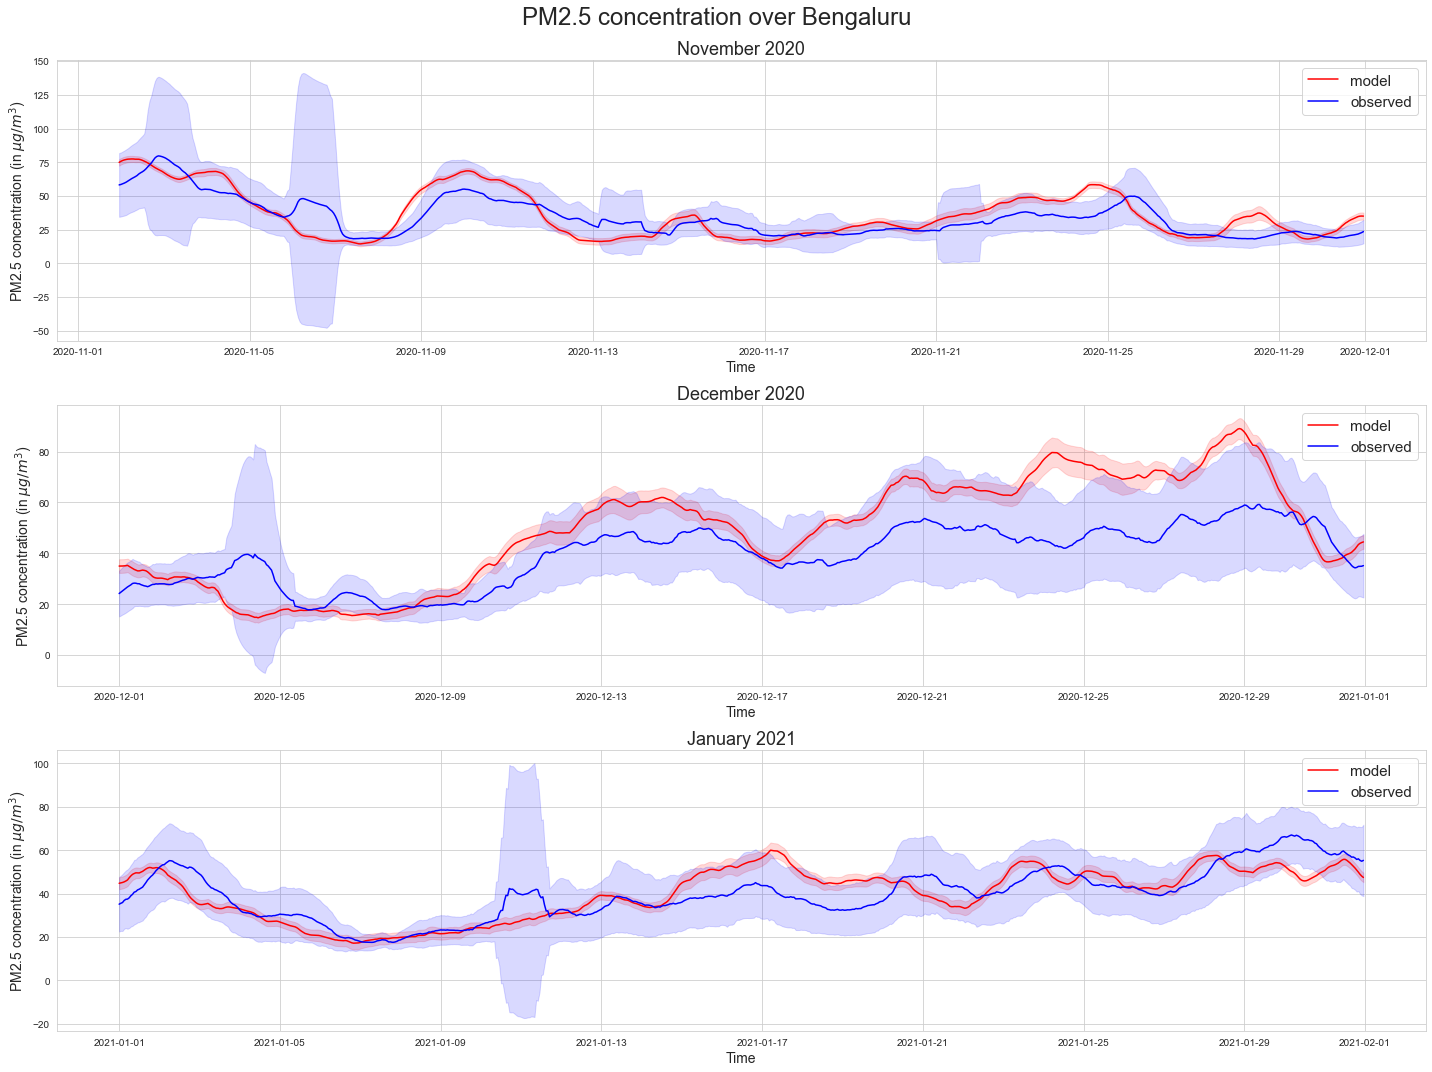

In [39]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_pm2'], yerr=dfmod_nov['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm2'] + dfnov['mod_pm2_stdev'], dfnov['mod_pm2'] - dfnov['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_pm2'], yerr=dfobs_nov['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm2'] + dfnov['obs_pm2_stdev'], dfnov['obs_pm2'] - dfnov['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfdec.index, dfdec['mod_pm2'], yerr=dfdec['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm2'] + dfdec['mod_pm2_stdev'], dfdec['mod_pm2'] - dfdec['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfdec.index, dfdec['obs_pm2'], yerr=dfdec['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm2'] + dfdec['obs_pm2_stdev'], dfdec['obs_pm2'] - dfdec['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfjan.index, dfjan['mod_pm2'], yerr=dfjan['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm2'] + dfjan['mod_pm2_stdev'], dfjan['mod_pm2'] - dfjan['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfjan.index, dfjan['obs_pm2'], yerr=dfjan['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm2'] + dfjan['obs_pm2_stdev'], dfjan['obs_pm2'] - dfjan['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Bengaluru', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err_running.png')

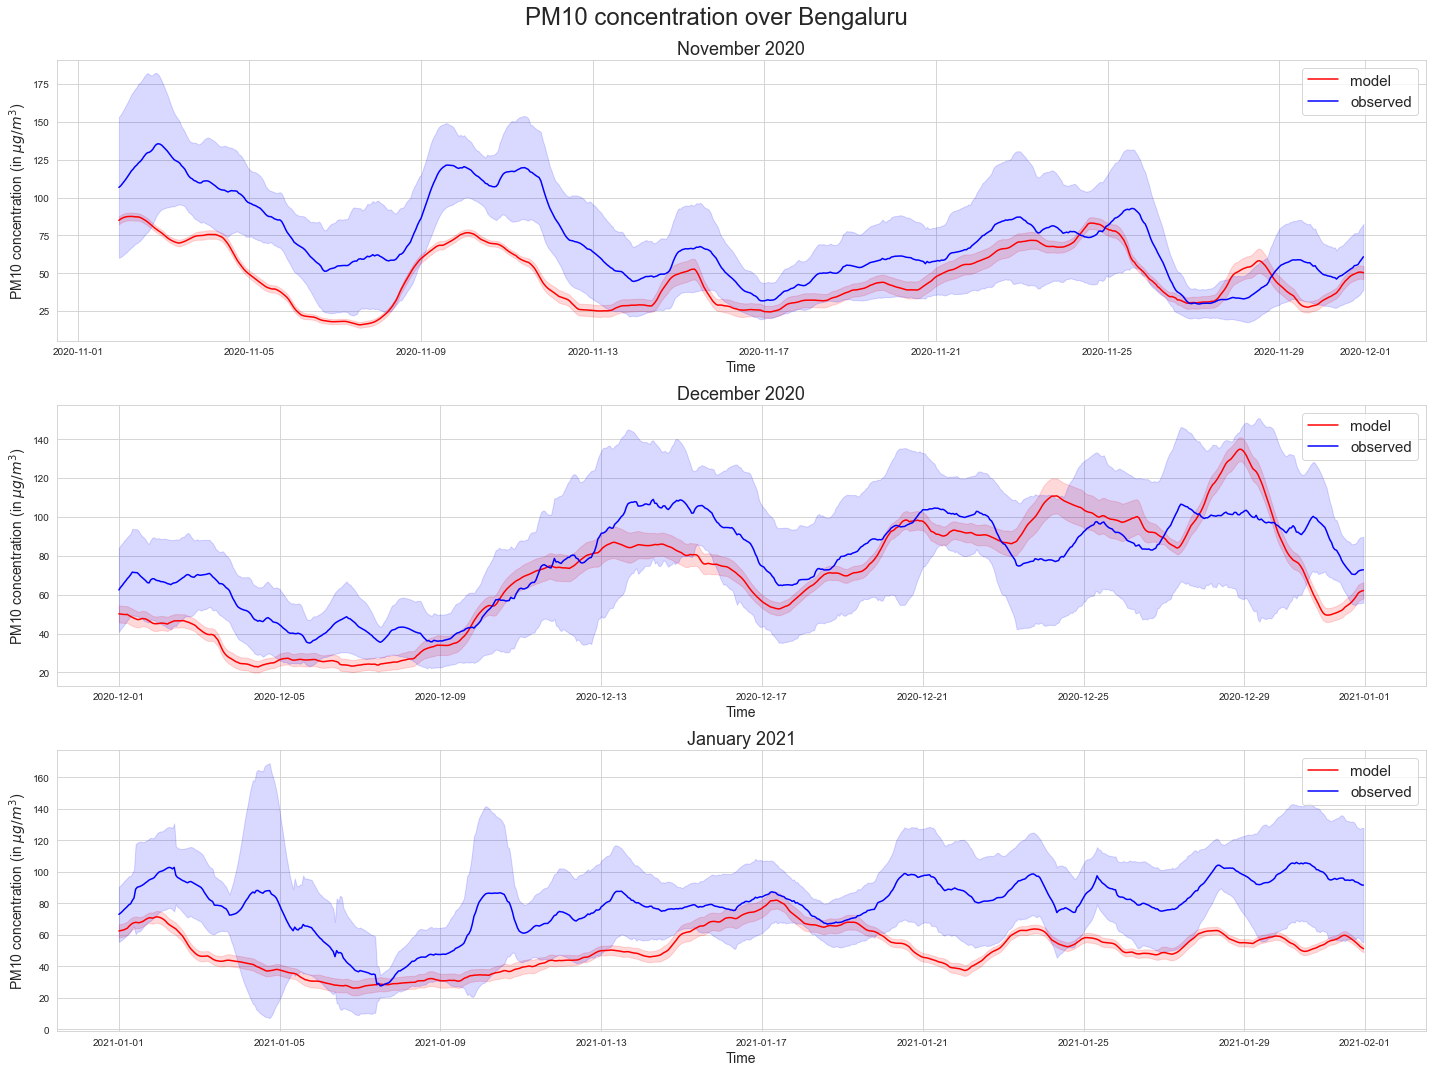

In [40]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm10'] + dfnov['mod_pm10_stdev'], dfnov['mod_pm10'] - dfnov['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm10'] + dfnov['obs_pm10_stdev'], dfnov['obs_pm10'] - dfnov['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm10'] + dfdec['mod_pm10_stdev'], dfdec['mod_pm10'] - dfdec['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm10'] + dfdec['obs_pm10_stdev'], dfdec['obs_pm10'] - dfdec['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm10'] + dfjan['mod_pm10_stdev'], dfjan['mod_pm10'] - dfjan['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm10'] + dfjan['obs_pm10_stdev'], dfjan['obs_pm10'] - dfjan['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Bengaluru', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err_running.png')

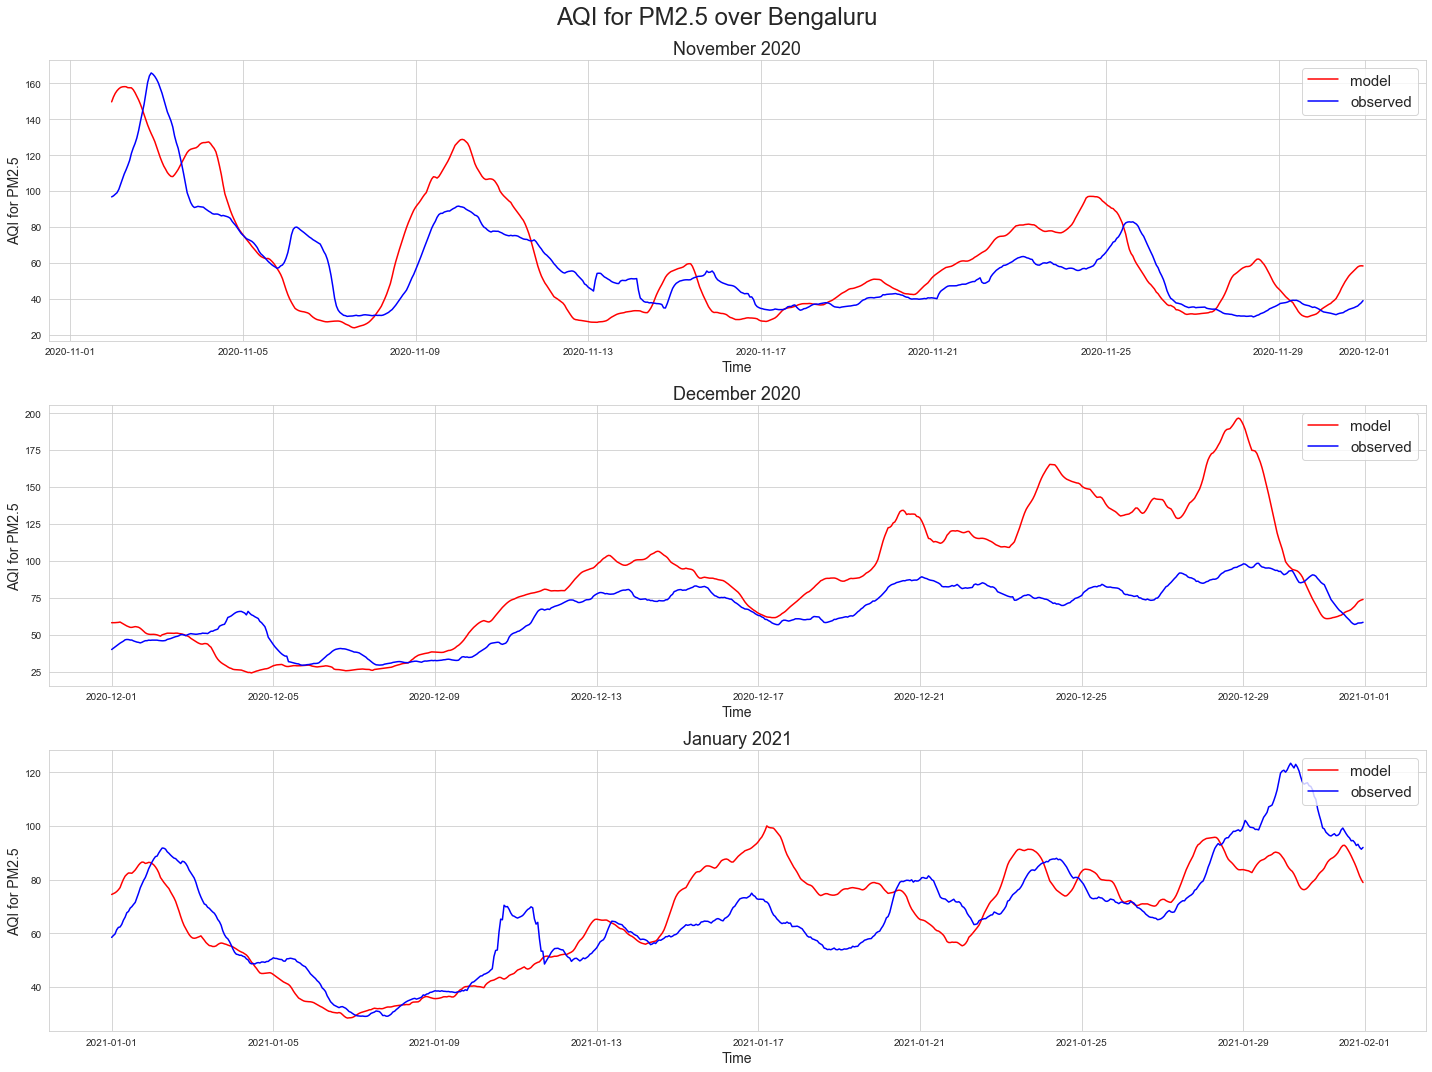

In [41]:
# Plot of AQI_PM2.5 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM2.5 over Bengaluru', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm25_ts.png')

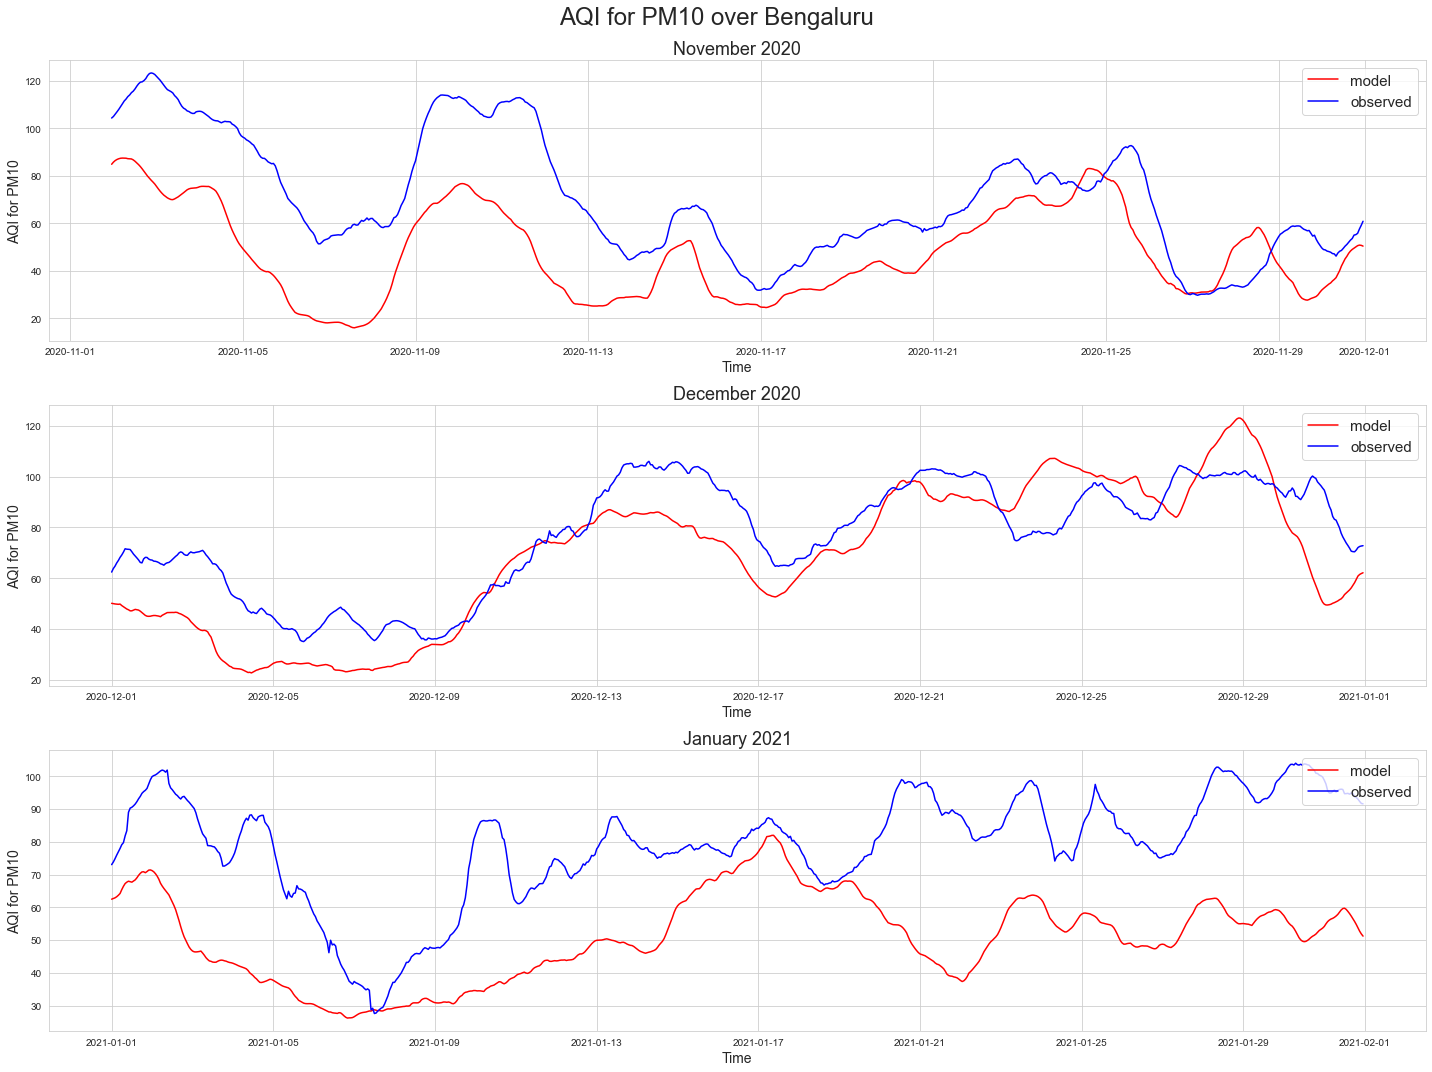

In [42]:
# Plot of AQI_PM10 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM10 over Bengaluru', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm10_ts.png')